# **Medical Cost Prediction : Visualisation and Modeling**

## **Importing Library**

In [ ]:
import numpy as np  # for linear algebra
import pandas as pd #  for data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
from scipy.stats import norm 
from scipy import stats

## **Loading and checking dataset**

In [ ]:
dataset = pd.read_csv('insurance.csv')

In [ ]:
print('\nNumber of rows and columns in the data set: ',dataset.shape) #printing no. of rows and coloumns


Number of rows and columns in the data set:  (1338, 7)


In [ ]:
dataset.head() # printing top few rows and columns in the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print('Data Info')
dataset.info() # checking no. of non_numerical coloumns

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


float64 : bmi, charges

int64 : age, children

object : sex, smoker, region

## **Data Dictionary**

**Independent Varriable**

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are   relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

**Dependent Varriable**

* charges: Individual medical costs billed by health insurance item




## **Visualising the effects of attributes on target attributes and other attributes**

**Effects of attribute Sex on dependent varriable Charges**

In [ ]:
dataset[["sex","charges"]].groupby(["sex"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Blues")

,sex,charges
1,male,13956.751178
0,female,12569.578844


From the above table it is seen that for the given dataset medical expenses of male are higher than that of female

**Effects of no. of children on dependent varriable Charges**

In [ ]:
dataset[["children","charges"]].groupby(["children"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Blues")

,children,charges
3,3,15355.318367
2,2,15073.563734
4,4,13850.656311
1,1,12731.171832
0,0,12365.975602
5,5,8786.035247


From the above table it is seen that those who have 5 childrens tend to have less medical expenses

**Effects of attribute Smoker on dependent varriable Charges**

In [ ]:
dataset[["smoker","charges"]].groupby(["smoker"], as_index = False).mean().sort_values(by = "smoker",ascending = False).style.background_gradient("Blues")

,smoker,charges
1,yes,32050.231832
0,no,8434.268298


We see that smokers have more medical expenses than non-smokers.

The difference is great, it can have a lot of influence on the model. We can use this by examining it better in the model part.

**Effects of attribute Region on dependent varriable Charges**

In [ ]:
dataset[["region","charges"]].groupby(["region"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Blues")

,region,charges
2,southeast,14735.411438
0,northeast,13406.384516
1,northwest,12417.575374
3,southwest,12346.937377


We see that people belong to southeast have highest medical expenses followed by northeast people

**Effects of attribute Region on other features**

In [ ]:
region = dataset.groupby("region", as_index=False)["age","bmi","children","charges"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by region \n")
region

Average value of other properties by region 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,region,age,bmi,children,charges
3,southwest,39.455385,30.596615,1.141538,12346.937377
0,northeast,39.268519,29.173503,1.046296,13406.384516
1,northwest,39.196923,29.199785,1.147692,12417.575374
2,southeast,38.939560,33.355989,1.049451,14735.411438


**Effects of attribute sex on other features**

In [ ]:
sex = dataset.groupby("sex", as_index=False)["age","bmi","children","charges"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by sex \n")
sex

Average value of other properties by sex 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,sex,age,bmi,children,charges
0,female,39.503021,30.377749,1.074018,12569.578844
1,male,38.917160,30.943129,1.115385,13956.751178


**Effects of attribute smoker on other features**

In [ ]:
smoker = dataset.groupby("smoker", as_index=False)["age","bmi","children","charges"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by smoker \n")
smoker

Average value of other properties by smoker 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,smoker,age,bmi,children,charges
0,no,39.385338,30.651795,1.090226,8434.268298
1,yes,38.514599,30.708449,1.113139,32050.231832


**Effects of attribute children on other features**

In [ ]:
children = dataset.groupby("children", as_index=False)["age","bmi","charges"].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by children \n")
children

Average value of other properties by children 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,children,age,bmi,charges
3,3,41.566879,30.684331,15355.318367
1,1,39.453704,30.623148,12731.171832
2,2,39.445833,30.978104,15073.563734
4,4,39.000000,31.391200,13850.656311
0,0,38.444251,30.550296,12365.975602
5,5,35.611111,29.605000,8786.035247


## **Handling Missing Value**

We will take a look at if there is any missing data in our data. If there are, we will try to eliminate them.

In [ ]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

we see that there is no missing data in the data.

## **Plots**

**Correlation Plot**

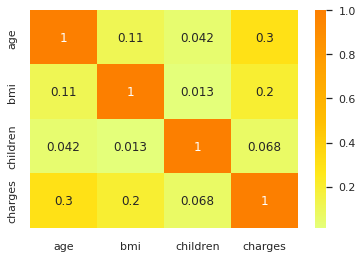

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

This plots clearly shows that thier no correlation among valiables.



**Scatter Plot**

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(dataset, color = 'charges')
fig.show()

This is the scatter plot matrix of the dataframe

**Histogram Plot (feature varriable)**

<Figure size 432x288 with 0 Axes>

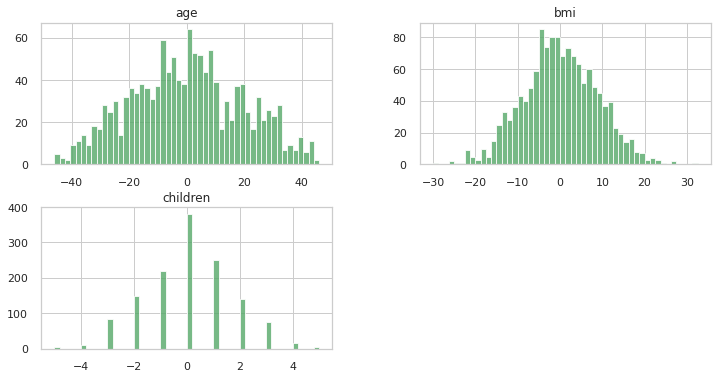

In [ ]:
%matplotlib inline
plt.figure();
dataset[['age', 'bmi', 'children']].diff().hist(color="g", alpha=0.8, bins=50, figsize=(12, 6));

Independent Varriable age,children, bmi follows fairly normal distribution.


**Histogram Plot (Charges)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'charges Distplot')

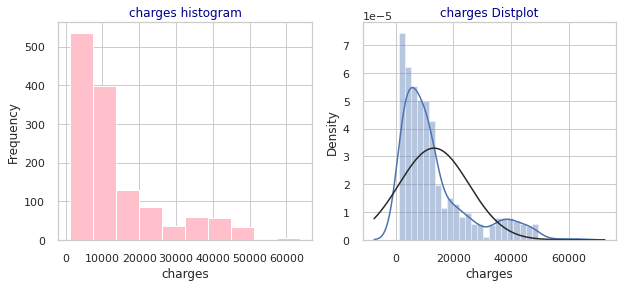

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(dataset["charges"], color="pink")
plt.xlabel("charges")
plt.ylabel("Frequency")
plt.title("charges histogram", color = "darkblue")
plt.subplot(1,2,2)
sns.distplot(dataset["charges"], fit=norm)
plt.title("charges Distplot", color = "darkblue")


We take a look at the charges distribution. On the second graph we can see more clearly that there is a tail to the right. We can edit this in the feature review section. It will make our model better.

## **Visualisation of the effect of different features on others**



In [ ]:
(mu, sigma) = norm.fit(dataset["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

mu charges : 13270.422265141257, sigma charges : 12105.484975561612


**Effect of age on Charges**

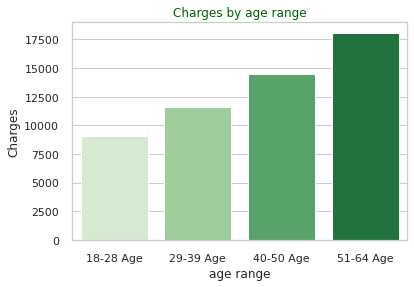

In [ ]:
ageFirstDecember = dataset[dataset["age"].between(18,28, inclusive = True)]["charges"].mean()
ageSecondDecember = dataset[dataset["age"].between(29,39, inclusive = True)]["charges"].mean()
ageThirdDecember = dataset[dataset["age"].between(40,50, inclusive = True)]["charges"].mean()
ageFourthDecember = dataset[dataset["age"].between(51,64, inclusive = True)]["charges"].mean()
averageAge = [ageFirstDecember,ageSecondDecember,ageThirdDecember,ageFourthDecember]
ageRanges = ["18-28 Age","29-39 Age","40-50 Age","51-64 Age"]
sns.barplot(x=ageRanges, y=averageAge, palette="Greens")
plt.title("Charges by age range", color = "darkgreen")
plt.xlabel("age range")
plt.ylabel("Charges")

plt.show()

we see the wages paid according to the average age. We see that the insurance charges increase as the age gets older. The highest wages appear between the ages of 51-64. We can use this in the model section.

**Effect of gender on Smoking Habbits**

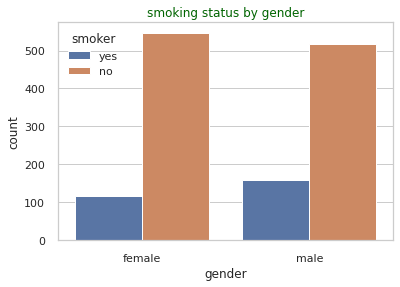

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="sex", hue="smoker", data=dataset)
plt.title("smoking status by gender", color = "darkgreen")
plt.xlabel("gender")
plt.show()

Here, we examined the smoking status by gender. Yhey look close to each other as men and women.

**Effect of no. of Children on Charges**

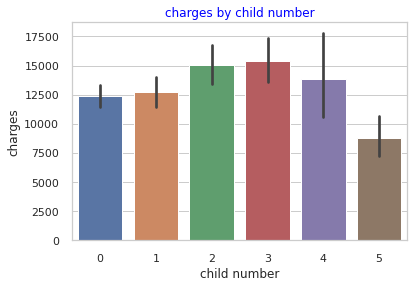

In [ ]:
sns.set_theme(style="whitegrid")
barplot= sns.barplot(x="children", y="charges", data=dataset)
plt.title("charges by child number", color = "blue")
plt.xlabel("child number")
plt.ylabel("charges")
plt.show()

Here we notice that at first with the increase of no. of children people were more opting for insurance, but after a certain no. it started decreasing 

**Effect of Smoking Status**

Text(0, 0.5, 'charges mean')

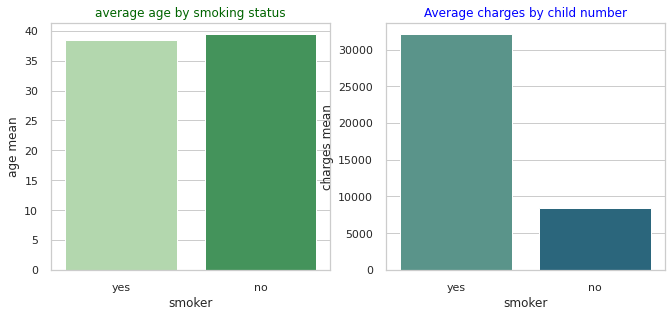

In [ ]:
smoker = ["yes", "no"]

smokerAge = []
smokerCharges = []

for each in smoker:
    smokerDistinction = dataset[dataset["smoker"] == each]
    xxx = smokerDistinction["age"].mean()
    yyy = smokerDistinction["charges"].mean()
    smokerAge.append(xxx)
    smokerCharges.append(yyy)

    
plt.figure(figsize=(11,10))
plt.subplot(2,2,1)
sns.barplot(x = smoker, y = smokerAge, palette= "Greens")
plt.title("average age by smoking status", color = "darkgreen")
plt.xlabel("smoker")
plt.ylabel("age mean")
plt.subplot(2,2,2)
sns.barplot(x = smoker, y = smokerCharges, palette="crest")
plt.title("Average charges by child number", color = "blue")
plt.xlabel("smoker")
plt.ylabel("charges mean")


*   In the first graph, the average age of smokers and non-smokers is looked at.
*   In the second graph, we look at the impact of smoking status on wages. Here we see that smokers pay much more than non-smokers.







/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



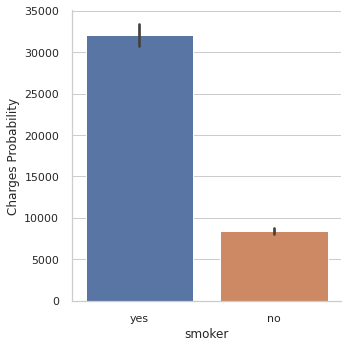

In [ ]:
g = sns.factorplot(x = "smoker", y = "charges", data = dataset, kind = "bar")
g.set_ylabels("Charges Probability")
plt.show()

Smoker's medical charges are more than the non-smokers

**Effect of Region on Charges**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



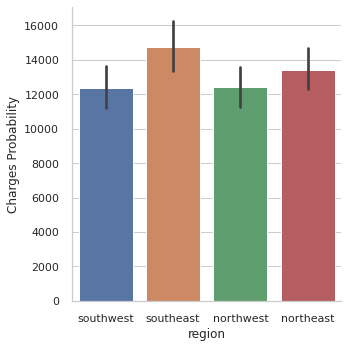

In [ ]:
g = sns.factorplot(x = "region", y = "charges", data = dataset, kind = "bar")
g.set_ylabels("Charges Probability")
plt.show()

People belong to southeast have the highest medical insurance charges

## **Feature Engineering**

Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

Label Encoding
One hot encoding
Dummy variable trap

Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.

In [ ]:
dataset["sex"] = [0 if i == "female" else 1 for i in dataset["sex"]]
dataset["sex"] = dataset["sex"].astype("category")
dataset = pd.get_dummies(dataset, columns= ["sex"])
dataset.head()

,age,bmi,children,smoker,region,charges,sex_0,sex_1
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


the gender is recorded as male and female. We change this to 0 and 1 so that our model can understand.

female --> 0

male --> 1




In [ ]:
dataset["smoker"] = [0 if i == "no" else 1 for i in dataset["smoker"]]
dataset["smoker"] = dataset["smoker"].astype("category")
dataset = pd.get_dummies(dataset, columns= ["smoker"])
dataset.head()

,age,bmi,children,region,charges,sex_0,sex_1,smoker_0,smoker_1
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


the smoking status is recorded as non-smoker and smoker. We change this to 0 and 1 so that our model can understand.

non-smoker --> 0

smoker --> 1

In [ ]:
dataset["region"] = [0 if i == "southeast" else 1 if i == "southwest" else 2 if i == "northwest" else 3 for i in dataset["region"]]
dataset["region"] = dataset["region"].astype("category")
dataset = pd.get_dummies(dataset, columns= ["region"])
dataset.head()

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,0,16884.92400,1,0,0,1,0,1,0,0
1,18,33.770,1,1725.55230,0,1,1,0,1,0,0,0
2,28,33.000,3,4449.46200,0,1,1,0,1,0,0,0
3,33,22.705,0,21984.47061,0,1,1,0,0,0,1,0
4,32,28.880,0,3866.85520,0,1,1,0,0,0,1,0


we are doing to the regions as we did above.


*   southeast --> 0

*   southwest --> 1

*   northwest --> 2

*   northeast --> 3










The original categorical variable are remove and also one of the one hot encode varible column for perticular categorical variable is droped from the column. So we completed all three encoding step by using get dummies function.



**Handling skewness of Charges**

By examining the charges in the charts above, we noticed that there was skewness. We took notes to fix this. We're going to fix this here.

In [ ]:
(mu, sigma) = norm.fit(dataset["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

mu charges : 13270.422265141257, sigma charges : 12105.484975561612


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



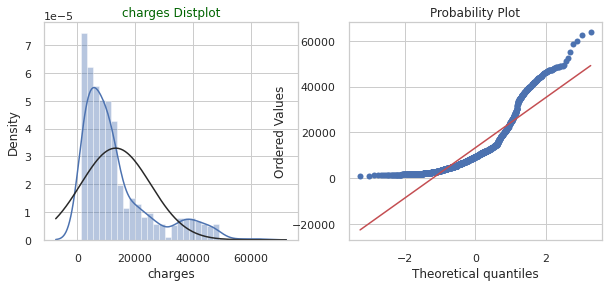

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dataset["charges"], fit=norm)
plt.title("charges Distplot", color = "darkgreen")
plt.subplot(1,2,2)
stats.probplot(dataset["charges"], plot = plt)
plt.show()

We have already taken a look at the first graphic above. We can see from the second graph that we have skewness in our data.

The more data is collected above the middle red line, the better.

There are many ways to fix this. one here we will use numpy library.

In [ ]:
dataset["charges"] = np.log1p(dataset["charges"])

In [ ]:
(mu, sigma) = norm.fit(dataset["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

mu charges : 9.098827980629359, sigma charges : 0.9190355163595243


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



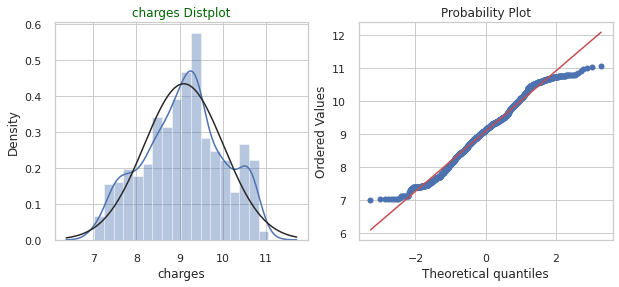

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dataset["charges"], fit=norm)
plt.title("charges Distplot", color = "darkgreen")
plt.subplot(1,2,2)
stats.probplot(dataset["charges"], plot = plt)
plt.show()


As we can see by comparing with the 2 graphs above. We see the fix.

## **Modeling**

**Importing Model Library**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError

**Defining Independent and Dependent Varriable**

In [ ]:
y = dataset.charges
X = dataset.drop(["charges"], axis = 1)

In [ ]:
print(X)

      age     bmi  sex_0  sex_1  ...  children_2  children_3  children_4  children_5
0      19  27.900      1      0  ...           0           0           0           0
1      18  33.770      0      1  ...           0           0           0           0
2      28  33.000      0      1  ...           0           1           0           0
3      33  22.705      0      1  ...           0           0           0           0
4      32  28.880      0      1  ...           0           0           0           0
...   ...     ...    ...    ...  ...         ...         ...         ...         ...
1333   50  30.970      0      1  ...           0           1           0           0
1334   18  31.920      1      0  ...           0           0           0           0
1335   18  36.850      1      0  ...           0           0           0           0
1336   21  25.800      1      0  ...           0           0           0           0
1337   61  29.070      1      0  ...           0           0     

In [ ]:
print(y)

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1338, dtype: float64


**Splitting dataset in Training Set and Test Set**

In [ ]:
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = test_size, random_state = 20)

In [ ]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))

X_train shape (1070, 16), len 1070.
X_test shape (268, 16), len 268.
Y_train shape (1070,), len 1070.
Y_test shape (268,), len 268.


**StandardScaler**

In [ ]:
result = []

We have defined the list in which we will save the model results for later comparison.

**A) Linear Regression**

Linear Regression establishes relationship between dependent variable  y  and one or more independent variable  x  using best fit line. It work on the principle of ordinary least square  (OLS)  / Mean square errror  (MSE) . In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.


In [ ]:
multiple_linear = LinearRegression()
multiple_linear.fit(X_train, Y_train)
predict = multiple_linear.predict(X_test)
score = r2_score(Y_test,predict)
result.append(score)

In [ ]:
print("r_square score --> ",score)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, predict)))

r_square score -->  0.8282127956714289
Mean Absolute Error --> 0.2655056614555981
Mean Squared Error --> 0.14749140174678843
Root Mean Squared Error --> 0.38404609325807293


In [ ]:
df_linearRegression = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})
df_linearRegression.head()

,Actual,Predicted
698,9.303580,9.266076
520,10.152594,9.093644
1144,9.172784,9.243573
908,9.627146,9.775839
559,7.406972,8.037555


For Linear Regression, we see the actual result and the results we predicted.

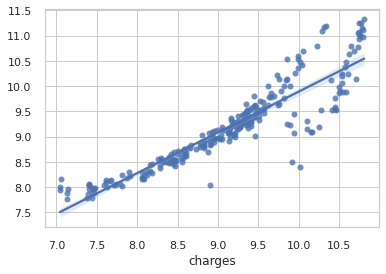

In [ ]:
sns.regplot(x= Y_test, y= predict, data=dataset)

**B) Random Forest**

Random forests or random decision forests are an ensemble learning method for regression and other tasks that operates by constructing a multitude of decision trees at training time.

For regression, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, Y_train)
rf_predict = regressor.predict(X_test)
np.set_printoptions(precision=2)
score_rf = r2_score(Y_test,rf_predict)
result.append(score_rf)

In [ ]:
print("r_square score --> ",score_rf)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, rf_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, rf_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, rf_predict)))

r_square score -->  0.8956853099512629
Mean Absolute Error --> 0.16248788683733079
Mean Squared Error --> 0.08956150091739466
Root Mean Squared Error --> 0.29926827582855264


In [ ]:
df_RandomForestRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': rf_predict})
df_RandomForestRegressor.head()

,Actual,Predicted
698,9.303580,9.301585
520,10.152594,9.226821
1144,9.172784,9.232577
908,9.627146,9.734281
559,7.406972,7.351666


For Random Forest Regression, we see the actual result and the results we predicted.

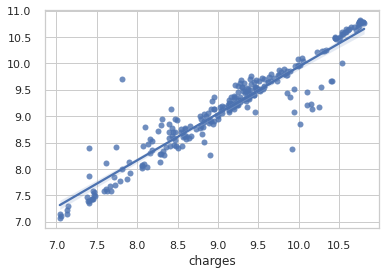

In [ ]:
sns.regplot(x= Y_test, y= rf_predict, data=dataset)

In [ ]:
df_result = pd.DataFrame({"Score":result, "ML Models":["LinearRegression","RandomForestRegression"]})

**We create a Dataframe with all our models and their results**

In [ ]:
df_result

,Score,ML Models
0,0.828213,LinearRegression
1,0.895685,RandomForestRegression


**value of r obtained from random forest pretty good compared to the linear regression**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



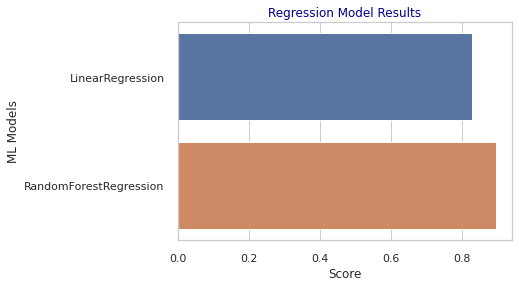

In [ ]:
g = sns.barplot("Score", "ML Models", data = df_result)
g.set_xlabel("Score")
g.set_title("Regression Model Results", color = "darkblue")
plt.show()

we examine the two results by visualizing.

As it is understood from the graph, accuracy of randomforset model close to 90 and best among the two  model is randomforset model is the best.

**Conclusions**


*  We see that the insurance charges increase as the age gets older. The highest wages appear between the ages of 51-64.
* we notice that at first with the increase of no. of children people were more opting for insurance, but after a certain no. it started decreasing
* Smoker's medical charges are more than the non-smokers
* People belong to southeast have the highest medical insurance charges.

***Random forest regression gives a better fit of the given dataset.***


